# <u>Self Practice 5 and 6</u>
Supervised Learning(Basic and Advanced) & Unsupervised Learning
***
Date: 11th November 2019<br>
Author: Samuel Natamihardja<br>
Company: Home Credit Indonesia

#### Importing Library

In [284]:
import pandas as pd #data wrangling
import numpy as np #calculation
import matplotlib.pyplot as plt #visualization
import seaborn as sns #visualization

# Algorithm Supervised Learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import LogisticRegression

#Algorithm Unsupervised Learning
from sklearn.cluster import KMeans #Kmeans Clustering
import scipy.cluster.hierarchy as sch #Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering # AgglomerativeClustering
from sklearn.cluster import DBSCAN #DBSCAN

#Model Evaluation
from sklearn import metrics
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import accuracy_score

#### Importing Dataset

In [285]:
df_train_raw = pd.read_csv('dataset/train.csv')
df_test_raw = pd.read_csv('dataset/test.csv')

In [286]:
row1 , column1 = df_train_raw.shape
row2 , column2 = df_test_raw.shape
print('Train dataset contains', row1, 'rows and', column1, 'columns.')
print('Test dataset contains', row2, 'rows and', column2, 'columns.')

Train dataset contains 8000 rows and 21 columns.
Test dataset contains 2000 rows and 20 columns.


In [287]:
# Preparing X_train, X_test, y_train, y_test
X_train = df_train_raw.drop(columns='att10', axis=1)
X_test = df_test_raw.copy()
y_train = df_train_raw[['att10']]
# y_test = df_test_raw[['att10']]

### Supervised Learning

Given the train.csv and test.csv, perform the following actions.
1. Create classifiers from train.csv data, in order to predict att10 as label based on the
rest of the attributes. Use at least 5 algorithms (k-NN, Decision Tree, Logistic
Regression, Voting, Averaging, Bagging, Random Forest, Averaging, Voting, AdaBoost,
XGBoost, LightGBM, CatBoost, or Stacking). Use AUC for your model evaluation
performance.
Submit your .ipynb file that contains your coding process in creating classifiers.
2. Choose the best Classifier based on highest AUC and use it for predicting the test.csv
data.
Submit your .csv file that contains the prediction of test.csv data. Sample of prediction
can be found in sample_prediction.csv file.
***

### Decision Tree (1st Algorithm)

In [288]:
# Create Decision Tree Object
clf_dt = DecisionTreeClassifier()

In [289]:
np.random.seed(42)

# Fit it to the training set to Decision Tree and predict 
clf_dt.fit(X_train, y_train)
y_pred_dt = clf_dt.predict(X_train)

# Get the accuracy score
acc_dt = accuracy_score(y_train, y_pred_dt)
print("Decision Tree Accuracy: {:0.3f}".format(acc_dt))

# Area Under Curve(AUC) for Decision Tree
fpr_train_dt, tpr_train_dt, threshold_dt = metrics.roc_curve(y_train, y_pred_dt)
print('Decision Tree AUC train = {}'.format(metrics.auc(fpr_train_dt, tpr_train_dt)))

Decision Tree Accuracy: 1.000
Decision Tree AUC train = 1.0


### K-NNeighbors (2nd Algorithm)

In [290]:
# Create K-NNeighbors Object
clf_knn = KNeighborsClassifier()

In [291]:
np.random.seed(42)

# Fit it to the training set to K-NNeighbors and predict 
clf_knn.fit(X_train, y_train)
y_pred_knn = clf_knn.predict(X_train)

# Get the accuracy score
acc_knn = accuracy_score(y_train, y_pred_knn)
print("K-NNeighbors Accuracy: {:0.3f}".format(acc_knn))

# Area Under Curve(AUC) for K-NNeighbors
fpr_train_knn, tpr_train_knn, threshold_knn = metrics.roc_curve(y_train, y_pred_knn)
print('K-NNeighbors AUC train = {}'.format(metrics.auc(fpr_train_knn, tpr_train_knn)))

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


K-NNeighbors Accuracy: 0.953
K-NNeighbors AUC train = 0.947972863134209


### Random Forest (3rd Algorithm)

In [292]:
# Create Random Forest Object
clf_rf = RandomForestClassifier()

In [293]:
np.random.seed(42)

# Fit it to the training set to Random Forest and predict 
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_train)

# Get the accuracy score
acc_rf = accuracy_score(y_train, y_pred_rf)
print("Random Forest Accuracy: {:0.3f}".format(acc_rf))

# Area Under Curve(AUC) for Random Forest
fpr_train_rf, tpr_train_rf, threshold_rf = metrics.roc_curve(y_train, y_pred_rf)
print('Random Forest AUC train = {}'.format(metrics.auc(fpr_train_rf, tpr_train_rf)))

Random Forest Accuracy: 0.998
Random Forest AUC train = 0.9955706096925482


D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


### Voting (4th Algorithm)

This algorithm using 3 algorithms aboved(Decision Tree, K-NNeighbors, Random Forest)

In [294]:
clf_voting = VotingClassifier(estimators=[
('knn', clf_knn),
('dt', clf_dt),
('lr', clf_rf)])

In [295]:
np.random.seed(42)

# Fit it to the training set to Voting and predict
clf_voting.fit(X_train, y_train)
y_pred_Voting = clf_voting.predict(X_train)

# Get the accuracy score
acc = accuracy_score(y_train, y_pred_Voting)
print("Accuracy: {:0.3f}".format(acc))

# Area Under Curve(AUC) for Voting
fpr_train_Voting, tpr_train_Voting, threshold_Voting = metrics.roc_curve(y_train, y_pred_Voting)
print('Voting AUC train = {}'.format(metrics.auc(fpr_train_Voting, tpr_train_Voting)))

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.998
Voting AUC train = 0.9963522668056279


### Stacking (5th Algorithm)

This algorithm using 4 algorithms aboved(Decision Tree, K-NNeighbors, Random Forest, Voting) and Stacked with Logistic Regression

In [296]:
# Create Logistic Regression Object
clf_lr = LogisticRegression()

# Create Stacking Object
sclf = StackingClassifier(classifiers=[clf_knn, clf_dt, clf_rf, clf_voting], 
                          meta_classifier=clf_lr)

In [297]:
np.random.seed(42)

# Fit it to the training set to Stacking and predict
sclf.fit(X_train, y_train)
y_pred_sclf = sclf.predict(X_train)

# Get the accuracy score
acc_sclf = accuracy_score(y_train, y_pred_sclf)
print("Stacking Classifier Accuracy: {:0.3f}".format(acc_sclf))

# Area Under Curve(AUC) for Stacking
fpr_train_sclf, tpr_train_sclf, threshold_sclf = metrics.roc_curve(y_train, y_pred_sclf)
print('Stacking AUC train = {}'.format(metrics.auc(fpr_train_sclf, tpr_train_sclf)))

D:\Anaconda3\lib\site-packages\mlxtend\classifier\stacking_classification.py:161: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  clf.fit(X, y)
D:\Anaconda3\lib\site-packages\mlxtend\classifier\stacking_classification.py:161: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X, y)
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_o

Stacking Classifier Accuracy: 1.000
Stacking AUC train = 0.9989577905158937


### Conclusion(Supervised Learning)

Summary of AUC for each algoritm above:

In [298]:
print('Decision Tree AUC train = {}'.format(metrics.auc(fpr_train_dt, tpr_train_dt)))
print('K-NNeighbors AUC train = {}'.format(metrics.auc(fpr_train_knn, tpr_train_knn)))
print('Random Forest AUC train = {}'.format(metrics.auc(fpr_train_rf, tpr_train_rf)))
print('Voting AUC train = {}'.format(metrics.auc(fpr_train_Voting, tpr_train_Voting)))
print('Stacking AUC train = {}'.format(metrics.auc(fpr_train_sclf, tpr_train_sclf)))

Decision Tree AUC train = 1.0
K-NNeighbors AUC train = 0.947972863134209
Random Forest AUC train = 0.9955706096925482
Voting AUC train = 0.9963522668056279
Stacking AUC train = 0.9989577905158937


Based on summary above, the highest AUC goes to Decision Tree algorithm.

In [299]:
np.random.seed(42)

# Fit it to the test set to Decision Tree and predict 
y_test_dt = clf_dt.predict(X_test)
tmp_y_pred = pd.DataFrame(y_test_dt)
tmp_y_pred['prediction_for_att10'] = tmp_y_pred[0]
tmp_y_pred.drop(columns=0, inplace=True)

# Copy test dataframe to new prediction dataframe
df_test_pred = df_test_raw.copy()

# add prediction to new dataframe
df_test_pred = df_test_pred.join(tmp_y_pred)
df_test_pred.head()

# Export prediction to csv
df_test_pred[['prediction_for_att10']].to_csv('prediction_of_test.csv')

### Unsupervised Learning

1. Select att1 and att2 from train.csv and test.csv data. This step will result a new data
frame or a table with size of 10,000 rows and 2 columns. Perform clustering using at
least 3 algorithms (K-Means Clustering, Hierarchical Clustering, and DBSCAN) to
cluster that new data frame.
Submit your .ipynb file that contain the process of your clustering!
2. Assume that the dataset you are working is the employee data, whether
att1 is satisfaction level (the higher the satisfaction level, the more satisfy a person
does in his employment)
att2 is evaluation result (the higher the evaluation result, the better/harder a person
works in the company).
Can you name the clusters that you have just made?
***

In [300]:
# Prepare dataset that going to be used for clustering
X_train_2 = df_train_raw[['att1','att2']]
X_test_2 = df_test_raw[['att1','att2']]
X = X_train_2.append(X_test_2)

row, column = X.shape
print('This dataset for Unsupervised Learning containing ', row, 'rows and' , column , 'columns.')

This dataset for Unsupervised Learning containing  10000 rows and 2 columns.


In [301]:
# Convertion from dataset to array
X = np.asarray(X)

Text(0.5, 1.0, 'Graph of Employee Clusters')

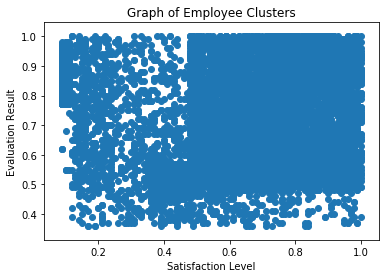

In [302]:
# Plot or Visualize the attributes
plt.scatter(X[:,0],X[:,1], label = 'True Position')
plt.xlabel("Satisfaction Level")
plt.ylabel("Evaluation Result")
plt.title("Graph of Employee Clusters")

### K-Means Clustering (1st Algorithm)

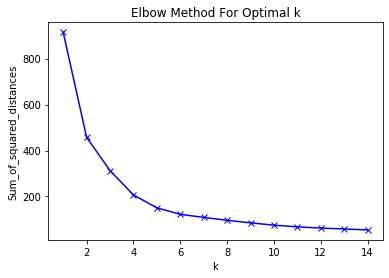

In [303]:
# 1st Step, Scree Plot to define how many clusters(K) we're going to have

Sum_of_squared_distances = []
K = range(1,15) # Range of 1 to 15
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [304]:
# From Scree plot/Elbow method above we pick K when it's on it's optimal point(min. Sum of Squared Distances and min. K)
# So we picked 5 as number of clusters.
km = KMeans(n_clusters=5)
km = km.fit(X)

Text(0.5, 1.0, 'Graph of Employee Clusters(Cluster Graph 1)')

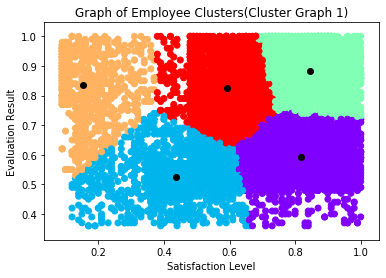

In [305]:
# re-Plot or Visualize the attributes after we've got the cluster labels by colors with centroid of the 
plt.scatter(X[:,0],X[:,1], label = 'True Position', c=km.labels_, cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black')
plt.xlabel("Satisfaction Level")
plt.ylabel("Evaluation Result")
plt.title("Graph of Employee Clusters(Cluster Graph 1)")

### Hierarchical Clustering  (2nd Algorithm)

Text(0.5, 1.0, 'Graph of Employee Clusters')

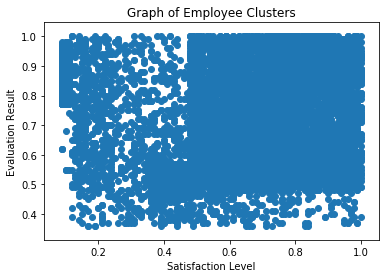

In [306]:
# Plot or Visualize the attributes
plt.scatter(X[:,0],X[:,1], label = 'True Position')
plt.xlabel("Satisfaction Level")
plt.ylabel("Evaluation Result")
plt.title("Graph of Employee Clusters")

In [307]:
# # Dendogram of hierarchical clustering
# dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

In [308]:
# Fitting hierarchical clustering 
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
hc.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=5,
                        pooling_func='deprecated')

Text(0.5, 1.0, 'Graph of Employee Clusters(Cluster Graph 2)')

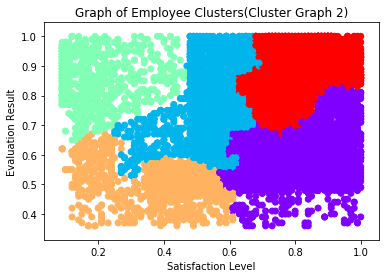

In [309]:
# re-Plot or Visualize the attributes after we've got the cluster labels by colors
plt.scatter(X[:,0],X[:,1], label = 'True Position', c=hc.labels_, cmap='rainbow')
plt.xlabel("Satisfaction Level")
plt.ylabel("Evaluation Result")
plt.title("Graph of Employee Clusters(Cluster Graph 2)")

### DBSCAN Clustering  (3rd Algorithm)

Text(0.5, 1.0, 'Graph of Employee Clusters')

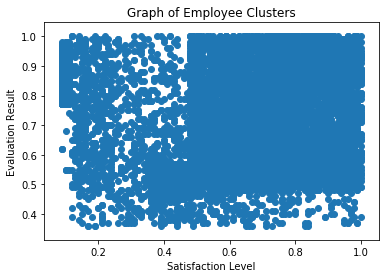

In [310]:
# Plot or Visualize the attributes
plt.scatter(X[:,0],X[:,1], label = 'True Position')
plt.xlabel("Satisfaction Level")
plt.ylabel("Evaluation Result")
plt.title("Graph of Employee Clusters")

In [311]:
# Fitting DBSCAN clustering
dbscan = DBSCAN()
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

Text(0.5, 1.0, 'Graph of Employee Clusters(Cluster Graph 3)')

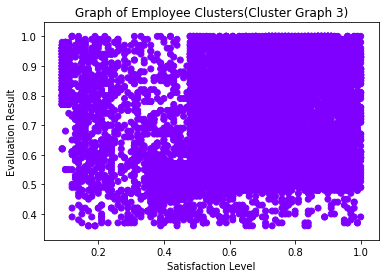

In [312]:
# re-Plot or Visualize the attributes after we've got the cluster labels by colors
plt.scatter(X[:,0],X[:,1], label = 'True Position', c=dbscan.labels_, cmap='rainbow')
plt.xlabel("Satisfaction Level")
plt.ylabel("Evaluation Result")
plt.title("Graph of Employee Clusters(Cluster Graph 3)")

### Conclusion(Unsupervised Learning)

After running some of clustering algorithms, we can see that for 1st(Cluster Graph 1) and 2nd(Cluster Graph 2) algorithm having some similarity.

After using elbow method We decised to separated employees into 5 Clusters and after seeing others company research, we can relate our finding to theirs as follow.
- Satisfied productive employee -> Highly Engaged employee
- Netral productive employee -> Engaged
- Unsatisfied productive employee -> Becoming Disengaged
- Satisfied lazy employee -> Disengaged employee
- Unstatisfied Lazy employee -> Highly Disengaged employee 

Referenced:
https://lets-talk-more.com/employee-engagement-2/